In [1]:
%%capture
!pip3 install pandas


In [2]:
import pandas as pd


json_file_path = 'data/pii-detection-removal-from-educational-data/train.json'
train_df = pd.read_json(json_file_path)

train_df.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6807 entries, 0 to 6806
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             6807 non-null   int64 
 1   full_text            6807 non-null   object
 2   tokens               6807 non-null   object
 3   trailing_whitespace  6807 non-null   object
 4   labels               6807 non-null   object
dtypes: int64(1), object(4)
memory usage: 319.1+ KB


In [4]:
len(train_df.labels[0]), len(train_df.labels[1])

(753, 563)

In [5]:
len(train_df.tokens[0]), len(train_df.tokens[1])

(753, 563)

In [6]:
train_df.shape

(6807, 5)

In [7]:
train_df.labels.value_counts()

labels
[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...]                                                          20
[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...]                                                          19
[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O,

In [8]:
df_exploded = train_df.explode('labels')


In [9]:
# Count the occurrences of each unique string
label_counts = df_exploded['labels'].value_counts()

# Display the counts
print(label_counts)

labels
O                   4989794
B-NAME_STUDENT         1365
I-NAME_STUDENT         1096
B-URL_PERSONAL          110
B-ID_NUM                 78
B-EMAIL                  39
I-STREET_ADDRESS         20
I-PHONE_NUM              15
B-USERNAME                6
B-PHONE_NUM               6
B-STREET_ADDRESS          2
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: count, dtype: int64


In [10]:
len(label_counts)

13

In [11]:
label_counts.index.tolist()

['O',
 'B-NAME_STUDENT',
 'I-NAME_STUDENT',
 'B-URL_PERSONAL',
 'B-ID_NUM',
 'B-EMAIL',
 'I-STREET_ADDRESS',
 'I-PHONE_NUM',
 'B-USERNAME',
 'B-PHONE_NUM',
 'B-STREET_ADDRESS',
 'I-URL_PERSONAL',
 'I-ID_NUM']

In [12]:
%%capture
%pip install matplotlib

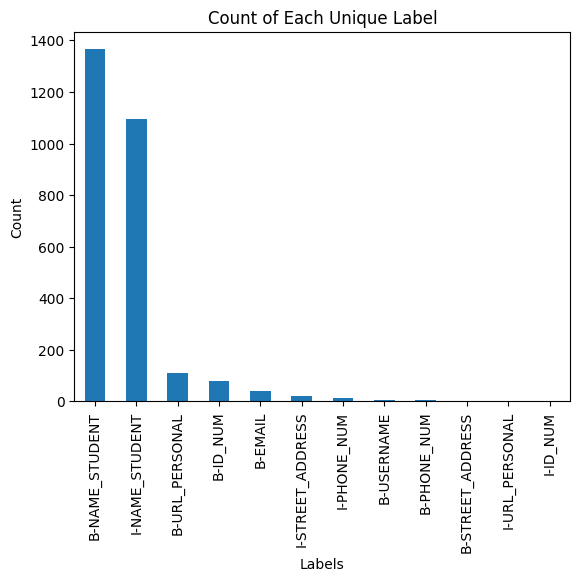

In [13]:
import matplotlib.pyplot as plt

# label_counts.plot(kind='bar')
# plot the counts for the labels excluding'O'
_label_counts = label_counts.tail(-1)
_label_counts.plot(kind='bar')

# set plot labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Each Unique Label')

# display the plot
plt.show()


In [14]:
train_df.full_text[0]

"Design Thinking for innovation reflexion-Avril 2021-Nathalie Sylla\n\nChallenge & selection\n\nThe tool I use to help all stakeholders finding their way through the complexity of a project is the  mind map.\n\nWhat exactly is a mind map? According to the definition of Buzan T. and Buzan B. (1999, Dessine-moi  l'intelligence. Paris: Les Éditions d'Organisation.), the mind map (or heuristic diagram) is a graphic  representation technique that follows the natural functioning of the mind and allows the brain's  potential to be released. Cf Annex1\n\nThis tool has many advantages:\n\n•  It is accessible to all and does not require significant material investment and can be done  quickly\n\n•  It is scalable\n\n•  It allows categorization and linking of information\n\n•  It can be applied to any type of situation: notetaking, problem solving, analysis, creation of  new ideas\n\n•  It is suitable for all people and is easy to learn\n\n•  It is fun and encourages exchanges\n\n•  It makes visi

In [15]:
train_df.labels[0]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-NAME_STUDENT',
 'I-NAME_STUDENT',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 '

In [16]:
# inspect the labels and tokens 
row = 0
tokens = train_df['tokens'][row]
labels = train_df['labels'][row]
df0 = pd.DataFrame({'tokens': tokens, 'labels': labels})
df0[:15].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,Design,Thinking,for,innovation,reflexion,-,Avril,2021,-,Nathalie,Sylla,\n\n,Challenge,&,selection
labels,O,O,O,O,O,O,O,O,O,B-NAME_STUDENT,I-NAME_STUDENT,O,O,O,O


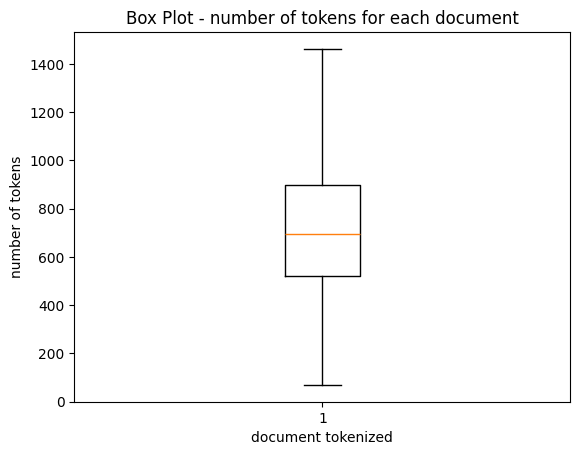

In [17]:
# how long are the texts /tokens
train_df['num_tokens'] = train_df['tokens'].apply(len)

# Plot the box plot of list lengths
plt.boxplot(train_df['num_tokens'], showfliers=False)

# Set plot labels and title
plt.xlabel('document tokenized')
plt.ylabel('number of tokens')
plt.title('Box Plot - number of tokens for each document')
plt.show()

In [18]:
# Count rows with token list length in the top quartile
count_long_text = train_df[train_df['tokens'].apply(len) > 897].shape[0]
len(train_df), count_long_text

(6807, 1696)

In [19]:
# how many outliers?
count_long_text = train_df[train_df['tokens'].apply(len) > 1400].shape[0]
len(train_df), count_long_text

# few outliers -> truncating the text will not influence results much
# an idea would be to split long documents into shorter documents and treat these as independed docs ?

(6807, 238)

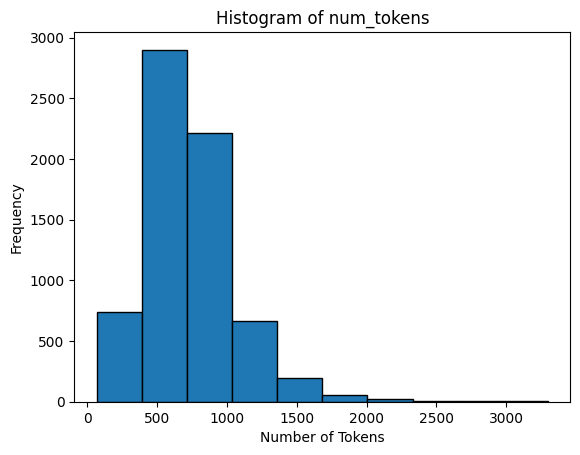

In [20]:
import matplotlib.pyplot as plt

# Plot a histogram for the 'num_tokens' column
plt.hist(train_df['num_tokens'], bins=10, edgecolor='black')
plt.title('Histogram of num_tokens')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

# distribution of number of tokens is mildly left skewed 
# this means most texts are short (below 1000 tokens)
# thus truncating the longer text will not result in that much information loss 
# (? still the dataset is small so idelaly we want to use all the info we have - split the long texts into shorter independent texts?)

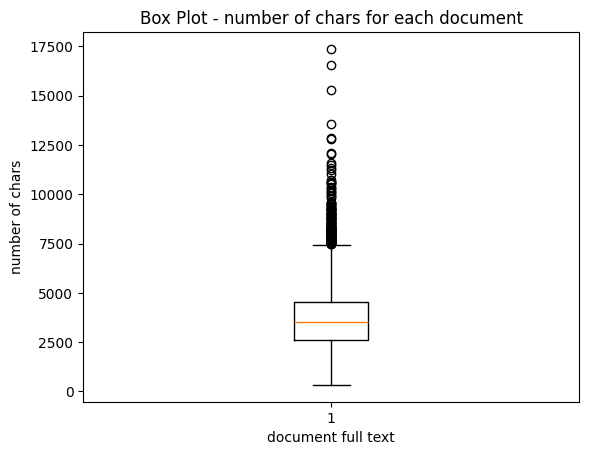

In [21]:
# how long are the texts /tokens
train_df['num_characters'] = train_df['full_text'].apply(len)

# Plot the box plot of list lengths
plt.boxplot(train_df['num_characters'], showfliers=True)

# Set plot labels and title
plt.xlabel('document full text')
plt.ylabel('number of chars')
plt.title('Box Plot - number of chars for each document')
plt.show()

Inspect how the labeles in the text


In [22]:
labels_list = label_counts.index.tolist()
labels_list

['O',
 'B-NAME_STUDENT',
 'I-NAME_STUDENT',
 'B-URL_PERSONAL',
 'B-ID_NUM',
 'B-EMAIL',
 'I-STREET_ADDRESS',
 'I-PHONE_NUM',
 'B-USERNAME',
 'B-PHONE_NUM',
 'B-STREET_ADDRESS',
 'I-URL_PERSONAL',
 'I-ID_NUM']

In [23]:
import random

# dysplay the tokens and text for a random row
def show_labeled_tokens(df, label, max_len=5):
    # get the rows that have text containing personal urls
    filtered_rows = df[df.apply(lambda row: label in row['labels'], axis=1)]
    idx_list = filtered_rows.index  
    print(f'{len(idx_list)} texts contain {label} labeled tokens\n')
    # get a random index from the list
    idx = random.choice(idx_list)
    target_list = df.loc[idx, 'labels']

    # Get the index location of the label in the list - the begining of an address
    index_location = target_list.index(label)
    print(f'{label} starts at index: {index_location}\n')
    finish = index_location + max_len
    print(f'TOKENS: {filtered_rows.tokens[idx][index_location:finish]}\n\n')
    print('TEXT:\n', ' '.join(filtered_rows.tokens[idx][index_location:finish]))
    

In [24]:
show_labeled_tokens(train_df,'B-NAME_STUDENT')

891 texts contain B-NAME_STUDENT labeled tokens

B-NAME_STUDENT starts at index: 0

TOKENS: ['Fabio', '\n\n', 'Challenge', '     ', 'My']


TEXT:
 Fabio 

 Challenge       My


In [25]:
show_labeled_tokens(train_df,'B-URL_PERSONAL')

72 texts contain B-URL_PERSONAL labeled tokens

B-URL_PERSONAL starts at index: 611

TOKENS: ['https://www.jackson.com/list/explorehomepage.htm', '\n\n', 'Insight', '&', 'Approach']


TEXT:
 https://www.jackson.com/list/explorehomepage.htm 

 Insight & Approach


In [26]:
show_labeled_tokens(train_df, 'B-ID_NUM', max_len=10)

33 texts contain B-ID_NUM labeled tokens

B-ID_NUM starts at index: 9

TOKENS: ['932353568953', ' ', 'Product', ':', 'Hair', 'Dresser', '\n\n', 'Questionnaire', '\n\n', '(']


TEXT:
 932353568953   Product : Hair Dresser 

 Questionnaire 

 (


In [27]:
show_labeled_tokens(train_df, 'B-USERNAME')

5 texts contain B-USERNAME labeled tokens

B-USERNAME starts at index: 1

TOKENS: ['meyermichelle', '\n\n', 'Reflection', '\n\n', 'The']


TEXT:
 meyermichelle 

 Reflection 

 The


In [28]:
show_labeled_tokens(train_df, 'B-STREET_ADDRESS', max_len=25)

2 texts contain B-STREET_ADDRESS labeled tokens

B-STREET_ADDRESS starts at index: 3

TOKENS: ['591', 'Smith', 'Centers', 'Apt', '.', '656', '\n', 'Joshuamouth', ',', 'RI', '95963', '(', 'The', 'Netherlands', ')', ' ', '410.526.1667', ' ', 'vpi@mn.nl', '\n\n', 'Mind', 'Mapping', ',', '     ', 'Challenge']


TEXT:
 591 Smith Centers Apt . 656 
 Joshuamouth , RI 95963 ( The Netherlands )   410.526.1667   vpi@mn.nl 

 Mind Mapping ,       Challenge


In [29]:
show_labeled_tokens(train_df, 'B-PHONE_NUM', max_len=10)

4 texts contain B-PHONE_NUM labeled tokens

B-PHONE_NUM starts at index: 18

TOKENS: ['(', '320)202', '-', '0688x95843', ' ', 'hwillis@gmail.com', ' ', 'www.adelaide.edu.au/writingcentre/', '\n\n', 'Mind']


TEXT:
 ( 320)202 - 0688x95843   hwillis@gmail.com   www.adelaide.edu.au/writingcentre/ 

 Mind


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6807 entries, 0 to 6806
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             6807 non-null   int64 
 1   full_text            6807 non-null   object
 2   tokens               6807 non-null   object
 3   trailing_whitespace  6807 non-null   object
 4   labels               6807 non-null   object
 5   num_tokens           6807 non-null   int64 
 6   num_characters       6807 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 683.5+ KB


In [31]:
# drop the columns we dont need
# columns to drop
columns_to_drop = ['document', 'full_text', 'trailing_whitespace', 'num_tokens', 'num_characters']
train_df = train_df.drop(columns=columns_to_drop)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tokens  6807 non-null   object
 1   labels  6807 non-null   object
dtypes: object(2)
memory usage: 417.6+ KB


In [32]:
train_df.head(2)

,tokens,labels
0,"[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."


In [33]:
labels_list

['O',
 'B-NAME_STUDENT',
 'I-NAME_STUDENT',
 'B-URL_PERSONAL',
 'B-ID_NUM',
 'B-EMAIL',
 'I-STREET_ADDRESS',
 'I-PHONE_NUM',
 'B-USERNAME',
 'B-PHONE_NUM',
 'B-STREET_ADDRESS',
 'I-URL_PERSONAL',
 'I-ID_NUM']

In [34]:
train_df.loc[0].labels[0]

'O'

In [35]:
# We only need the names for longformer finetunining -> rename all other labels as Other?
# all labels that are not names become 'O'
names = ['B-NAME_STUDENT', 'I-NAME_STUDENT']
name_labels_lists = []
for lab_list in train_df.labels:
    new_list = []
    for label in lab_list:
        if label in names:
            new_list.append(label)
        else:
            new_list.append('O')
    name_labels_lists.append(new_list)

train_df['name_labels'] = name_labels_lists
train_df.head(2)


,tokens,labels,name_labels
0,"[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."


In [36]:
df_exploded = train_df.explode('labels')
# Count the occurrences of each unique string
label_counts = df_exploded['labels'].value_counts()

# Display the counts
print(label_counts)

labels
O                   4989794
B-NAME_STUDENT         1365
I-NAME_STUDENT         1096
B-URL_PERSONAL          110
B-ID_NUM                 78
B-EMAIL                  39
I-STREET_ADDRESS         20
I-PHONE_NUM              15
B-USERNAME                6
B-PHONE_NUM               6
B-STREET_ADDRESS          2
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: count, dtype: int64


In [37]:
df_exploded = train_df.explode('name_labels')
# Count the occurrences of each unique string
label_counts = df_exploded['name_labels'].value_counts()

# Display the counts
print(label_counts)

# data is very imbalanced - first train the model on this for baseline

name_labels
O                 4990072
B-NAME_STUDENT       1365
I-NAME_STUDENT       1096
Name: count, dtype: int64


In [38]:
# drop the labels column as we dont need it for name NER
train_df = train_df.drop(columns=['labels'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tokens       6807 non-null   object
 1   name_labels  6807 non-null   object
dtypes: object(2)
memory usage: 417.6+ KB


### Split train-validation NER data stratified 
-too complicated- revisit if needed later

In [43]:
# split the data into train and validation
# normal sckit learn test_train_split does not work as both x and y contain lists :
# (1) there are multiple entities, and also 
# (2) each sample has a different distribution of entities
# solution:  https://datascience.stackexchange.com/questions/104785/how-to-perform-entity-level-train-val-test-split-for-ner-task
!pip3 install deep_utils
# from deep_utils import stratify_train_test_split_multi_label # this errors

In [44]:
from typing import Union

import numpy as np

from deep_utils.utils.algorithm_utils.main import subset_sum


def stratify_train_test_split_multi_label(
    x: Union[list, tuple, np.ndarray], y: np.ndarray, test_size=0.2, closest_ratio=False
):
    """
        A handy function for splitting multi-label samples based on their number of classes. This is mainly useful for
    object detection and ner-like tasks that each sample may contain several objects/tags from different classes! The
    process of splitting starts from classes with the smallest number of samples to make sure their ratio is saved
    because they have small numbers of samples, retaining the ratio for them is challenging compared to those classes
    with more samples
    :param x: A list, Tuple or ndarray that contains the samples
    :param y: A 2D array that represents the number of labels in each class. Each column is representative of a class.
    As an example: y = np.array([[2, 3], [1, 1]]) says that sample one has
    two objects/tags for class 0 and 3 objects/tags for class 1 and so on
    :param test_size: size of the test set
    :param closest_ratio: For huge arrays extracting the closest ratio requires an intensive recursive function to work
     which could result in maximum recursion error. Being set to True will choose samples from the those with the smallest difference to the target number to ensure the best ratio. Set this variable to True if you are sure. by default is set to False.
    :return:
    >>> y = np.array([[1, 2, 0], [1, 0, 0], [1, 2, 0]])
    >>> x = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    >>> stratify_train_test_split_multi_label(x, y, test_size=0.3)
    (array([[2, 2, 2],
           [3, 3, 3]]), array([[1, 1, 1]]), array([[1, 0, 0],
           [1, 2, 0]]), array([[1, 2, 0]]))
    >>> x = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
    >>> y = np.array([[0, 0], [0, 0], [0, 1], [0, 1], [1, 1], [1, 1], [1, 0], [1, 0]])
    >>> x_train, x_test, y_train, y_test = stratify_train_test_split_multi_label(x, y, test_size=0.5, closest_ratio=False)
    >>> x_train
    array([[1, 2],
           [3, 4],
           [1, 2],
           [3, 4]])
    >>> x_test
    array([[1, 2],
           [3, 4],
           [1, 2],
           [3, 4]])
    >>> y_train
    array([[0, 1],
           [0, 1],
           [1, 0],
           [1, 0]])
    >>> y_test
    array([[1, 1],
           [1, 1],
           [0, 0],
           [0, 0]])
    >>> print("class ratio:", tuple(y_test.sum(0) / y.sum(0)))
    class ratio: (0.5, 0.5)
    >>> print("sample ratio:", y_test.shape[0] / y.shape[0])
    sample ratio: 0.5
    """
    assert len(y.shape) == 2, "y should be 2D"
    assert test_size > 0.0, "test_size cannot be a zero or negative value!"
    x = np.array(x, dtype=np.object_) if not isinstance(x, np.ndarray) else x

    # excluding samples with no objects/tags
    non_objects = np.any(y.sum(1) == 0)
    if non_objects:
        y_no_objects = y[y.sum(1) == 0]
        x_no_objects = x[y.sum(1) == 0]
        x = x[y.sum(1) > 0]
        y = y[y.sum(1) > 0]

    available_samples = np.ones((y.shape[0]), dtype=np.bool8)
    test_samples = np.zeros((y.shape[0]), dtype=np.bool8)
    train_samples = np.zeros((y.shape[0]), dtype=np.bool8)
    class_sample_counts = y.sum(axis=0)
    ideal_train_size = np.floor(sum(class_sample_counts) * (1 - test_size))

    # stratify starts from a class with the lowest number of samples
    class_indices = np.argsort(class_sample_counts)
    for class_index in class_indices:
        test_number_samples = y[:, class_index][test_samples].sum()
        n_test = np.ceil(class_sample_counts[class_index] * test_size)
        n_test = max(0, n_test - test_number_samples)
        input_labels = y[:, class_index].copy()
        input_labels[np.invert(available_samples)] = 0
        if n_test == 0 or len(input_labels) == 0:
            continue
        if closest_ratio:
            chosen_indices, *_ = subset_sum(
                input_numbers=input_labels, target_number=n_test
            )
        else:
            sorted_indices = np.argsort(input_labels)
            cum_sum_values = np.cumsum(input_labels[sorted_indices])
            chosen_indices = sorted_indices[cum_sum_values < n_test].tolist()
            if len(chosen_indices) < len(sorted_indices):
                chosen_indices.append(sorted_indices[len(chosen_indices)])
        # Update available_samples, train_samples, test_samples
        for update_index, n_label in enumerate(input_labels):
            if n_label == 0:
                # samples that have no elements are ignored ...
                continue
            if update_index in chosen_indices:
                test_samples[update_index] = True
                train_samples[update_index] = False
            else:
                test_samples[update_index] = False
                train_samples[update_index] = True
            available_samples[update_index] = False
    # Allocating all the remaining samples to train because the code structure ensures the ratio of test
    # samples to the whole dataset.
    train_samples = np.bitwise_or(train_samples, np.bitwise_not(test_samples))

    if non_objects:
        # splitting samples with no objects trying to save the balance between train and test numbers

        train_left = int(ideal_train_size - sum(train_samples))
        indices = np.arange(len(y_no_objects))
        np.random.shuffle(indices)

        x_no_objects_train, y_no_objects_train = (
            x_no_objects[:train_left],
            y_no_objects[:train_left],
        )
        x_no_objects_test, y_no_objects_test = (
            x_no_objects[train_left:],
            y_no_objects[train_left:],
        )

        return (
            np.concatenate([x[train_samples], x_no_objects_train]),
            np.concatenate([x[test_samples], x_no_objects_test]),
            np.concatenate([y[train_samples], y_no_objects_train]),
            np.concatenate([y[test_samples], y_no_objects_test]),
        )
    else:
        return x[train_samples], x[test_samples], y[train_samples], y[test_samples]
    


# for the function to work y needs to have int labels not strings
# also it needs the tags lists to be the same size

In [45]:

df = pd.DataFrame({
    "name_labels": [[1, 2, 3], [3, 2, 1], [2, 1, 3], [1, 2, 3], [3, 1, 2], [2, 3, 1], [1, 3, 2], [3, 1, 2], [2, 3, 1], [1, 2, 3]],
    "tokens": [["apple", "orange", "banana"], ["banana", "apple", "orange"], ["orange", "banana", "apple"],
               ["apple", "orange", "banana"], ["banana", "apple", "orange"], ["orange", "banana", "apple"],
               ["apple", "orange", "banana"], ["banana", "apple", "orange"], ["orange", "banana", "apple"],
               ["apple", "orange", "banana"]]
})

In [46]:
x_values = df[['tokens']].values
x = np.array([[item for item in sublist[0]] for sublist in x_values])
# Convert to Union[list, tuple, np.ndarray]
# converted_x_values: Union[list, tuple, np.ndarray] = x_values.tolist()  # a list of lists
# x = converted_x_values

# convert y panadas object into a np array 
y_values = df[['name_labels']].values 
y = np.array([[item for item in sublist[0]] for sublist in y_values])

In [47]:
x_train, x_validation, y_train, y_validation = stratify_train_test_split_multi_label(x, y, test_size=0.2,
                                          closest_ratio=False)

/var/folders/tf/50mx1bq91j7gsfdlgc40j37r0000gn/T/ipykernel_91613/1373813384.py:71: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  available_samples = np.ones((y.shape[0]), dtype=np.bool8)
/var/folders/tf/50mx1bq91j7gsfdlgc40j37r0000gn/T/ipykernel_91613/1373813384.py:72: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  test_samples = np.zeros((y.shape[0]), dtype=np.bool8)
/var/folders/tf/50mx1bq91j7gsfdlgc40j37r0000gn/T/ipykernel_91613/1373813384.py:73: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  train_samples = np.zeros((y.shape[0]), dtype=np.bool8)


In [48]:
x_train.shape, x_validation.shape

((6, 3), (4, 3))

In [49]:
x_train, x_validation

(array([['banana', 'apple', 'orange'],
        ['orange', 'banana', 'apple'],
        ['banana', 'apple', 'orange'],
        ['orange', 'banana', 'apple'],
        ['banana', 'apple', 'orange'],
        ['orange', 'banana', 'apple']], dtype='<U6'),
 array([['apple', 'orange', 'banana'],
        ['apple', 'orange', 'banana'],
        ['apple', 'orange', 'banana'],
        ['apple', 'orange', 'banana']], dtype='<U6'))

In [50]:
y_train, y_validation

(array([[3, 2, 1],
        [2, 1, 3],
        [3, 1, 2],
        [2, 3, 1],
        [3, 1, 2],
        [2, 3, 1]]),
 array([[1, 2, 3],
        [1, 2, 3],
        [1, 3, 2],
        [1, 2, 3]]))

In [51]:
ydf =  pd.DataFrame({'tags': y_train.tolist()})
yt_exploded = ydf.explode('tags')
# Count the occurrences of each unique string
lc= yt_exploded['tags'].value_counts()

# Display the counts
print(lc)

tags
3    6
2    6
1    6
Name: count, dtype: int64


In [52]:
ydf =  pd.DataFrame({'tags': y_validation.tolist()})
yt_exploded = ydf.explode('tags')
# Count the occurrences of each unique string
lc= yt_exploded['tags'].value_counts()

# Display the counts
print(lc)

tags
1    4
2    4
3    4
Name: count, dtype: int64


### Split train-validation no stratification 

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tokens       6807 non-null   object
 1   name_labels  6807 non-null   object
dtypes: object(2)
memory usage: 417.6+ KB


In [54]:
df_exploded = train_df.explode('name_labels')
# Count the occurrences of each unique string
label_counts = df_exploded['name_labels'].value_counts()

# Display the counts
print(label_counts)


name_labels
O                 4990072
B-NAME_STUDENT       1365
I-NAME_STUDENT       1096
Name: count, dtype: int64


In [55]:
labels = ['O', 'B-NAME_STUDENT', 'I-NAME_STUDENT']

In [58]:
%%capture
!pip3 install scikit-learn

In [59]:
# spliting stratified is complicated
# split without stratification
# this can be done also directly in huggingface datasets 
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(train_df['tokens'], train_df['name_labels'], test_size=0.2, random_state=42)


In [60]:
traindata = pd.concat([X_train, y_train], axis=1)
valdata = pd.concat([X_validation, y_validation], axis=1)

In [61]:
traindata.head(2)

,tokens,name_labels
1092,"[Visualization, tool, to, control, Humidity, &...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
4750,"[Visualization, \n\n, Challenge, and, selectio...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [62]:
valdata.head(2)

,tokens,name_labels
4624,"[Assignment, :, Mindmapping, \n\n, Challenge, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1740,"[Reflection, –, Learning, Launch, \n\n, Paola,...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."


In [63]:
df_exploded = traindata.explode('name_labels')
# Count the occurrences of each unique string
label_counts = df_exploded['name_labels'].value_counts()

# Display the counts
print(label_counts)

name_labels
O                 3984880
B-NAME_STUDENT       1102
I-NAME_STUDENT        852
Name: count, dtype: int64


In [64]:
df_exploded = valdata.explode('name_labels')
# Count the occurrences of each unique string
label_counts = df_exploded['name_labels'].value_counts()

# Display the counts
print(label_counts)

name_labels
O                 1005192
B-NAME_STUDENT        263
I-NAME_STUDENT        244
Name: count, dtype: int64


# Fit the transformer model for NER 
on colab notebook: kaggle_pii_ner_colab_longfromer.ipynb